# Maximizing Total Satisfaction in a Bipartite Matching Problem

## Problem Description

In this problem, we aim to solve a bipartite matching problem to maximize the total satisfaction of matches between men and women. Given a set of $n$ men $M = \{ m_1, m_2, \ldots, m_n \}$ and a set of $n$ women $F = \{ f_1, f_2, \ldots, f_n \}$, we define a bipartite graph $G = (V, E)$, where the vertex set $V = M \cup F$ and the edge set $E \subseteq M \times F$. Each edge $(i, j) \in E$ has a weight $w_{ij}$ representing the satisfaction of matching man $m_i$ with woman $f_j$.

The objective is to find a perfect matching that maximizes the total satisfaction, subject to the constraint that each man is matched with exactly one woman and vice versa.

#### Mathematical Formulation

We define the decision variable $x_{ij}$ as follows:
$$
x_{ij} =
\begin{cases}
1 & \text{if man } m_i \text{ is matched with woman } f_j \\
0 & \text{otherwise}
\end{cases}
$$

The optimization problem can be solved using an integer programmig (IP):
$$
\begin{aligned}
& \text{maximize} & & \sum_{(i, j) \in E} w_{ij} x_{ij} \\
& \text{subject to} & & \sum_{j : (i, j) \in E} x_{ij} = 1 \quad \forall i \in M \\
& & & \sum_{i : (i, j) \in E} x_{ij} = 1 \quad \forall j \in F \\
& & & x_{ij} \in \{0, 1\} \quad \forall (i, j) \in E
\end{aligned}
$$
<br>
Since solving the IP can be computationally challenging, we will use relaxation, meaning we will change the constrains to be linear. Then, we can reformulate the problem as a Linear Programming problem as follows:
$$
\begin{aligned}
& \text{maximize} & & \sum_{(i, j) \in E} w_{ij} x_{ij} \\
& \text{subject to} & & \sum_{j : (i, j) \in E} x_{ij} = 1 \quad \forall i \in M \\
& & & \sum_{i : (i, j) \in E} x_{ij} = 1 \quad \forall j \in F \\
& & & 0 \leq x_{ij} \leq 1 \quad \forall (i, j) \in E
\end{aligned}
$$

## Monte Carlo Simulation and Success Ratio
We will perform Monte Carlo simulations to evaluate the success ratio of the LP relaxation in providing integral solutions (i.e., solutions where $x_{ij}$ is either 0 or 1) for different values of $k$. Here, $k$ represents the number of edges each man can have, indicating the number of women he can potentially be matched with.

For each value of $k$ ranging from 2 to 100, we will perform the following:
- Generate a bipartite graph with random weights.
- Solve the corresponding LP problem.
- Check if the solution is integral.
- Calculate the success ratio, defined as the percentage of simulations where the LP solution was integral.

The results are plotted to show the success ratio as a function of $k$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

In [ ]:
# Function to perform one simulation
def run_simulation(n, k):
    # Step 1: Generate bipartite graph edges with random weights
    edges = []
    for i in range(n):
        # for specific i, find k random matches in j
        possible_j = np.random.choice(n, k, replace=False) # replace=False to prevent getting same sample
        for j in possible_j:
            # for the k random matches, define random weights from the range 1 to 10
            rand_weight = np.random.randint(1, 10)

            # save as tuple with the format format (index i for Male, index j for Female, random weight)
            edges.append((i, j, rand_weight))

            #print("edge i=" + str(i) + " j=" + str(j) + " will get value: " + str(rand_weight))

    #print(edges)

    # Step 2: Set up LP problem
    c = [-w for _, _, w in edges]  # coefficients of the linear objective function (negative for maximization)
    A_eq = np.zeros((2 * n, len(edges))) # equality constraint matrix
    b_eq = np.ones(2 * n) # equality constraint vector

    for idx, (i, j, _) in enumerate(edges):
        A_eq[i, idx] = 1
        A_eq[n + j, idx] = 1

    bounds = [(0, 1) for _ in edges] # min & max for decision variable

    # Step 3: Solve LP problem
    result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')
    opt_decision_variables = result.x
    algorithm_success = result.success
    algorithm_status = result.status

    if algorithm_success:
      is_integral_sol = all((val == 0 or val == 1) for val in opt_decision_variables)
    else:
      is_integral_sol = False

    return opt_decision_variables, algorithm_success, algorithm_status, is_integral_sol

In [ ]:
# Define necessary parameters
n = 100
k_values = range(2, 101)
success_ratios = []
num_monte_carlo = 100

In [ ]:
# Main simulation loop
for k in k_values:
    successes = 0
    for _ in range(num_monte_carlo):
        opt_decision_variables, algorithm_success, algorithm_status, is_integral_sol = run_simulation(n, k)
        if algorithm_success and is_integral_sol:
            successes += 1
    success_ratios.append(successes / 100)

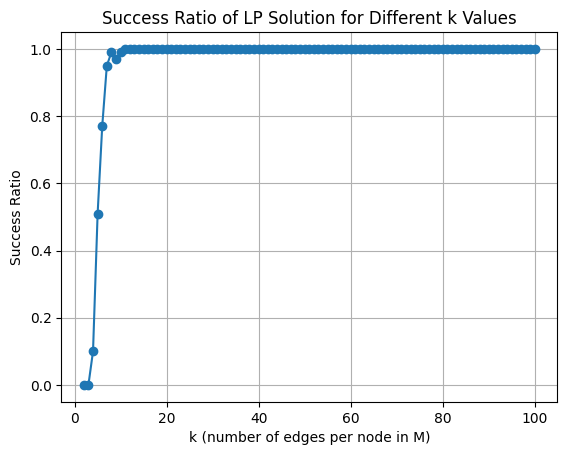

In [ ]:
# Plotting the results
plt.plot(k_values, success_ratios, marker='o')
plt.xlabel('k (number of edges per node in M)')
plt.ylabel('Success Ratio')
plt.title('Success Ratio of LP Solution for Different k Values')
plt.grid(True)
plt.show()

# Solve Linear Programming Problem for a Specific Graph
In this section we will perform the linprog solution on the following graph:

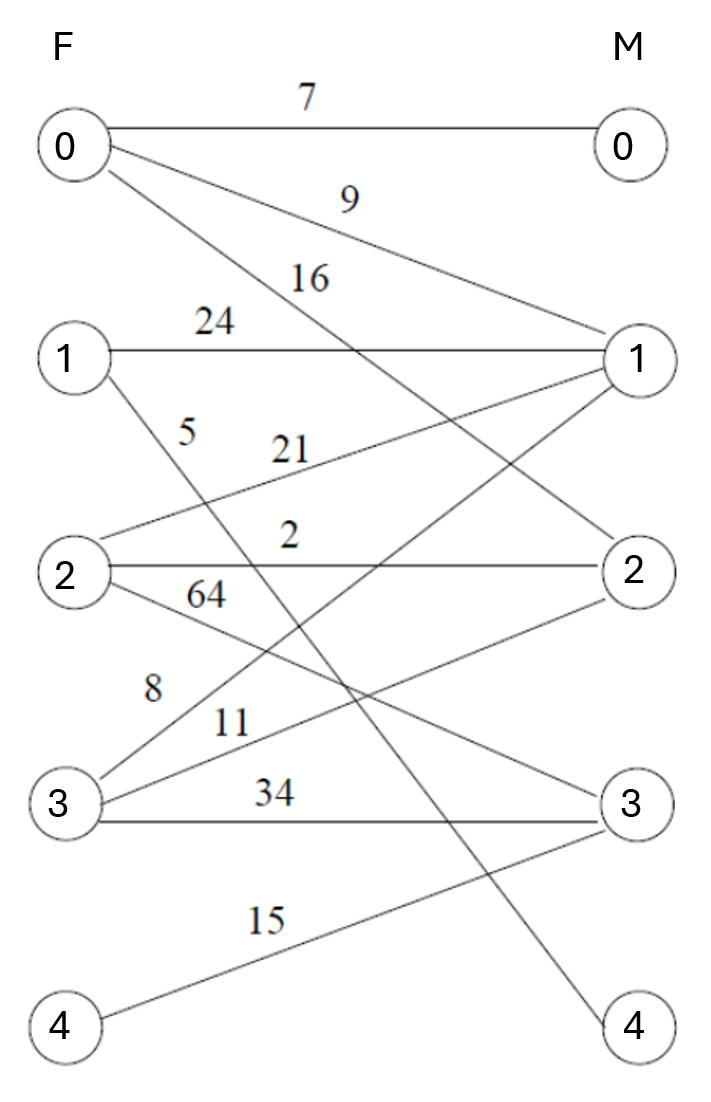

In [4]:
# Set up static values
n = 5 # number of males, each man with different amount of edges

# Step 1: Generate bipartite graph edges with deterministic weights --> (male node i, female node j, weight)
deterministic_edges = [(0,0,7),(1,0,9),(1,1,24),(1,2,21),(1,3,8),(2,0,16),(2,2,2),(2,3,11),(3,2,64),(3,3,34),(3,4,15),(4,1,5)]

# Step 2: Set up LP problem
c = [-w for _, _, w in deterministic_edges]  # coefficients of the linear objective function (negative for maximization)
A_eq = np.zeros((2 * n, len(deterministic_edges))) # equality constraint matrix initialization
b_eq = np.ones(2 * n) # equality constraint vector

for idx, (i, j, _) in enumerate(deterministic_edges):
    A_eq[i, idx] = 1
    A_eq[n + j, idx] = 1

bounds = [(0, 1) for _ in deterministic_edges] # min & max for decision variable

# Step 3: Solve LP problem
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')
opt_decision_variables = result.x
algorithm_success = result.success
algorithm_status = result.status

if algorithm_success:
  is_integral_sol = all((val == 0 or val == 1) for val in opt_decision_variables)
else:
  is_integral_sol = False

In [10]:
if algorithm_success:
    print("The optimal decision variables are:")
    print(opt_decision_variables)

The optimal decision variables are:
[ 1.  0. -0.  1. -0. -0.  0.  1. -0.  0.  1.  1.]
